# Midterm
## Regression
*BD-2007: Khakim, Kazybek, Alikhan*

In [1]:
import numpy as np # import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Clean_Dataset.csv') # import dataset
df#.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.drop(columns={'Unnamed: 0'}, inplace=True) # drop useless column

In [4]:
df.info() # here we can see that, 0 nan values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
df.corr() # checking correlation for numerical columns
# As we can see it only 20% correlation with duration
# So we will try to make new numerical features

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [6]:
df.stops.unique() # We can convert them to numeric

array(['zero', 'one', 'two_or_more'], dtype=object)

In [7]:
df.loc[df['stops'] == 'zero', 'stops'] = '0'
df.loc[df['stops'] == 'one', 'stops'] = '1'
df.loc[df['stops'] == 'two_or_more', 'stops'] = '2.5'

In [8]:
df.stops = pd.to_numeric(df.stops)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  float64
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 25.2+ MB


In [9]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0.0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0.0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0.0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0.0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0.0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1.0,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,1.0,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,1.0,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,1.0,Evening,Hyderabad,Business,10.00,49,81585


In [10]:
df['departure_time'].unique() # now, try to convert departure and arrival times to numeric

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [11]:
df.loc[df['departure_time'] == 'Early_Morning', 'departure_time'] = '7' # We googled time range's of the day 
df.loc[df['departure_time'] == 'Morning', 'departure_time'] = '10.5' # and take mean of their range
df.loc[df['departure_time'] == 'Afternoon', 'departure_time'] = '15'
df.loc[df['departure_time'] == 'Evening', 'departure_time'] = '19.5'
df.loc[df['departure_time'] == 'Night', 'departure_time'] = '22.5'
df.loc[df['departure_time'] == 'Late_Night', 'departure_time'] = '3'

In [12]:
df['departure_time'] = pd.to_numeric(df['departure_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  float64
 4   stops             300153 non-null  float64
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 25.2+ MB


In [13]:
df['arrival_time'] = df['departure_time'] + df.duration # arrival time is departure time + duration of flight

In [14]:
df.corr()['price'] # check correlation now and see that duration is still most correlated :(

departure_time    0.028422
stops             0.088134
arrival_time      0.166172
duration          0.204222
days_left        -0.091949
price             1.000000
Name: price, dtype: float64

In [15]:
df.airline.unique() # We have only 6 air companies

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [16]:
smth = df.groupby(['airline'])['flight'].unique()

In [17]:
smth # each airline has flight which starts with specific combination of symbols
# And they are useless

airline
AirAsia      [I5-764, I5-747, I5-744, I5-784, I5-721, I5-77...
Air_India    [AI-887, AI-665, AI-441, AI-453, AI-504, AI-50...
GO_FIRST     [G8-334, G8-336, G8-392, G8-338, G8-266, G8-10...
Indigo       [6E-5001, 6E-6202, 6E-549, 6E-6278, 6E-5328, 6...
SpiceJet     [SG-8709, SG-8157, SG-8169, SG-2976, SG-339, S...
Vistara      [UK-995, UK-963, UK-945, UK-927, UK-951, UK-93...
Name: flight, dtype: object

In [18]:
df.drop(columns={'flight'}, inplace=True)
# so we dropped them

In [19]:
df.source_city.unique(), df.destination_city.unique() # we see that we have only 6 cities for 2 columns

(array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
       dtype=object),
 array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
       dtype=object))

In [20]:
# We thought that arriving to one city is another from departing from the same city
# so I decided to make them different for program
df.source_city = 's' + df.source_city
df.destination_city = 'd' + df.destination_city

In [21]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,sDelhi,19.5,0.0,21.67,dMumbai,Economy,2.17,1,5953
1,SpiceJet,sDelhi,7.0,0.0,9.33,dMumbai,Economy,2.33,1,5953
2,AirAsia,sDelhi,7.0,0.0,9.17,dMumbai,Economy,2.17,1,5956
3,Vistara,sDelhi,10.5,0.0,12.75,dMumbai,Economy,2.25,1,5955
4,Vistara,sDelhi,10.5,0.0,12.83,dMumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,sChennai,10.5,1.0,20.58,dHyderabad,Business,10.08,49,69265
300149,Vistara,sChennai,15.0,1.0,25.42,dHyderabad,Business,10.42,49,77105
300150,Vistara,sChennai,7.0,1.0,20.83,dHyderabad,Business,13.83,49,79099
300151,Vistara,sChennai,7.0,1.0,17.00,dHyderabad,Business,10.00,49,81585


In [22]:
new_df = pd.get_dummies(df[['source_city', 'destination_city', 'airline']], drop_first = False) # using get dummies

In [23]:
new_df = pd.concat([new_df, df[['stops', 'departure_time', 'arrival_time', 'class', 'days_left', 'price']]], axis=1) 
# and make final df to train

In [24]:
new_df.loc[new_df['class'] == 'Economy', 'class'] = '0'
new_df.loc[new_df['class'] == 'Business', 'class'] = '1'

new_df['class'] = pd.to_numeric(new_df['class'])
# also change 'class' to numeric

In [25]:
new_df.head() # here we have 24 columns

,source_city_sBangalore,source_city_sChennai,source_city_sDelhi,source_city_sHyderabad,source_city_sKolkata,source_city_sMumbai,destination_city_dBangalore,destination_city_dChennai,destination_city_dDelhi,destination_city_dHyderabad,...,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,stops,departure_time,arrival_time,class,days_left,price
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0.0,19.5,21.67,0,1,5953
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0.0,7.0,9.33,0,1,5953
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.0,7.0,9.17,0,1,5956
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0.0,10.5,12.75,0,1,5955
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0.0,10.5,12.83,0,1,5955


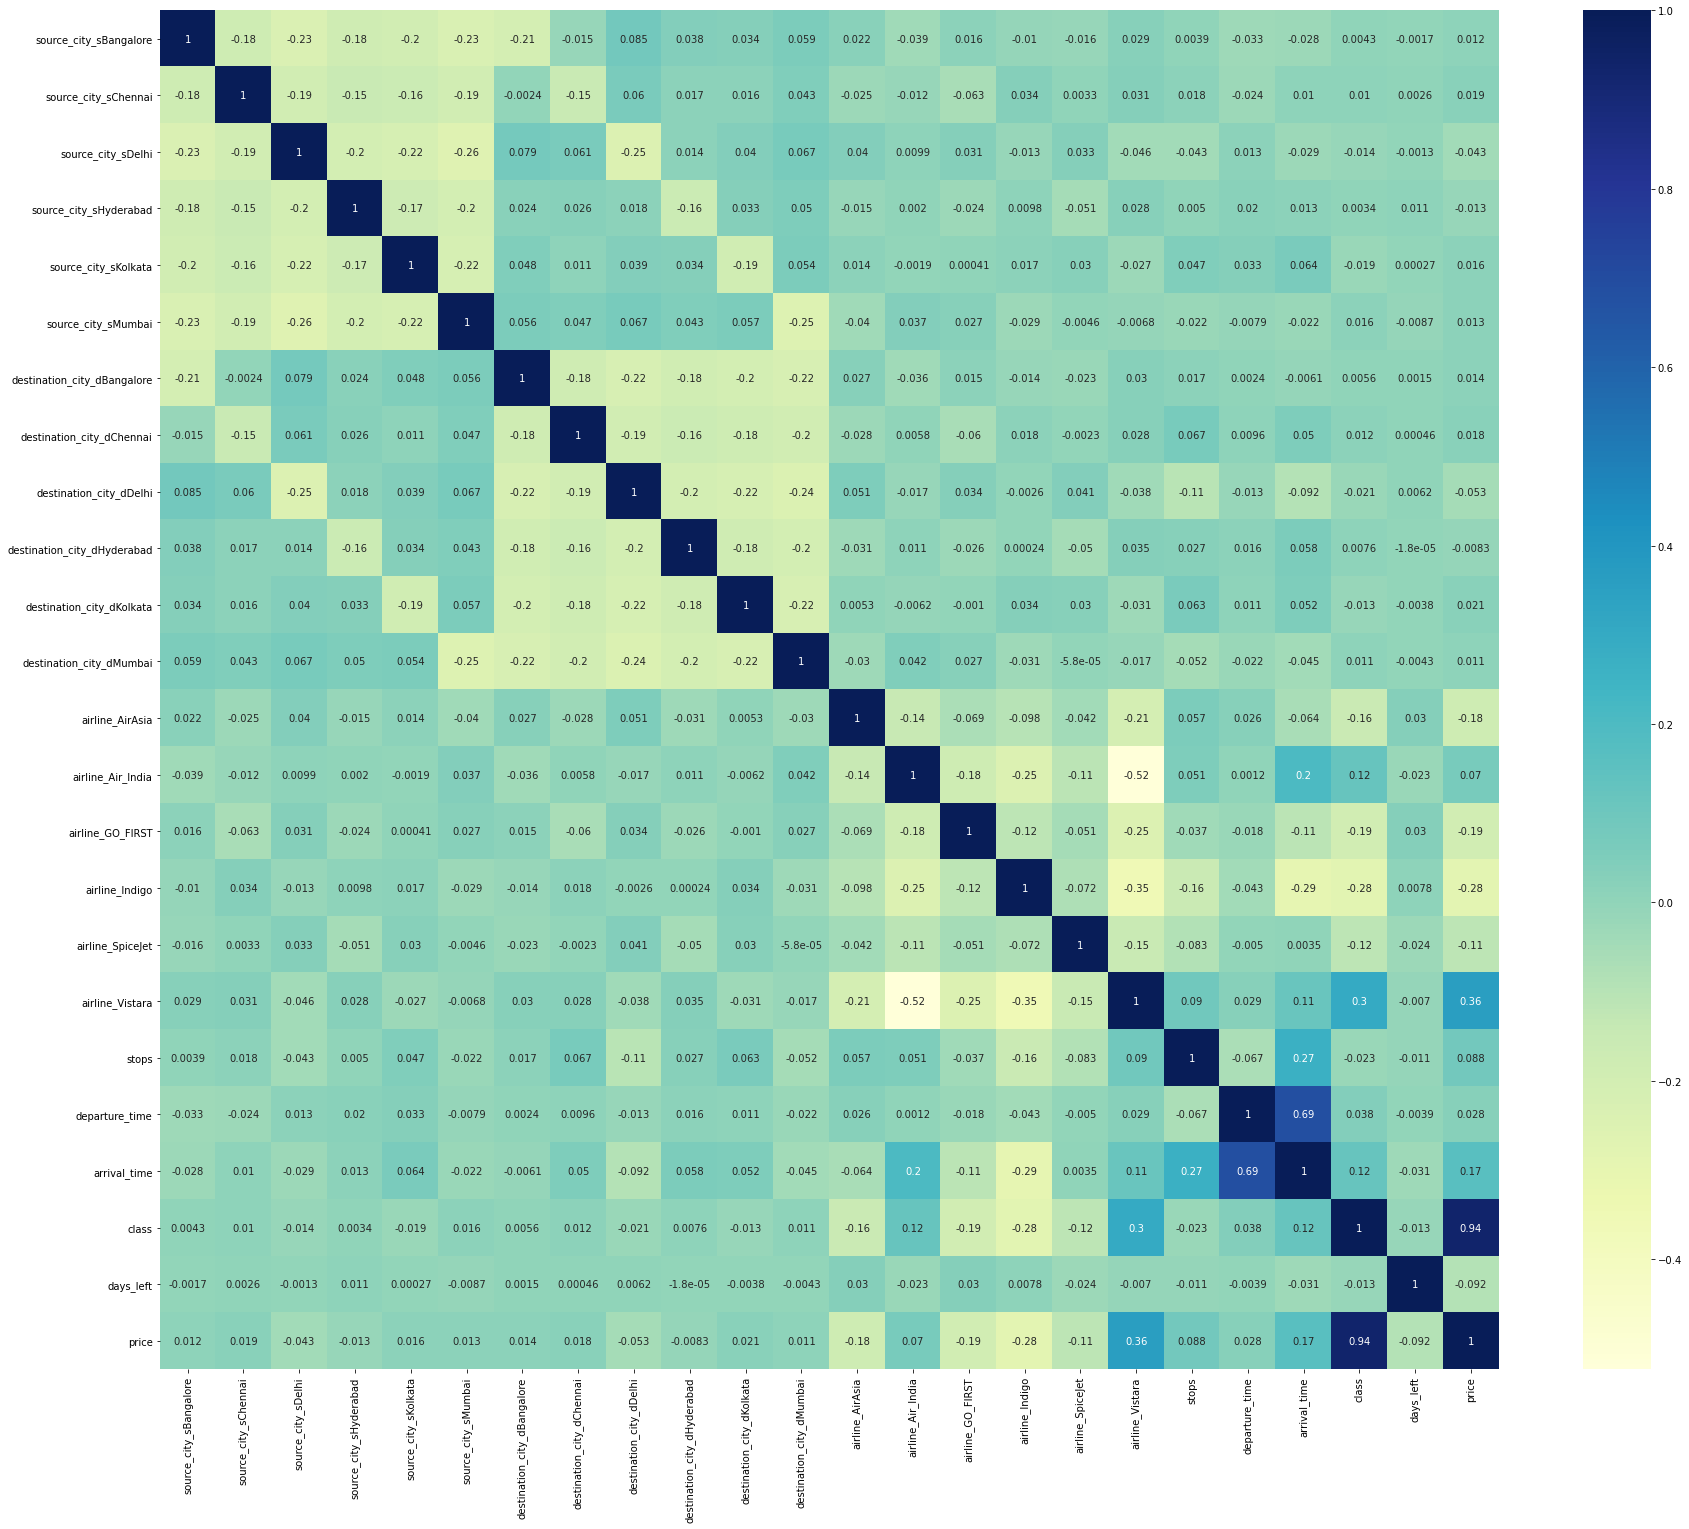

In [26]:
plt.figure(figsize = (30, 25)) # we can see that only 'class' have high correlation
sns.heatmap(new_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split # split df to train and test
y = new_df.price 
X = new_df.drop(columns={'price'})
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf

In [29]:
model_lr = LinearRegression().fit(X_train, y_train) # Linear regression fit 

In [30]:
model_lr.score(X_train, y_train)

0.9080288202496198

In [31]:
test_pred = model_lr.predict(X_test) # and results

print('R-squared:', round(metrics.r2_score(y_test, test_pred), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=True), 3))
print('RMSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=False), 3))
print('MAE:', round(metrics.median_absolute_error(y_test, test_pred), 3))

R-squared: 0.908
MSE: 47783741.354
RMSE: 6912.578
MAE: 2776.063


In [32]:
from sklearn.ensemble import RandomForestRegressor# now fit random forest

In [33]:
regr = RandomForestRegressor().fit(X_train, y_train)
regr.score(X_train, y_train)

0.9974345987922623

In [34]:
test_pred = regr.predict(X_test)

print('R-squared:', round(metrics.r2_score(y_test, test_pred), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=True), 3))
print('RMSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=False), 3))
print('MAE:', round(metrics.median_absolute_error(y_test, test_pred), 3))

R-squared: 0.985
MSE: 7914802.081
RMSE: 2813.326
MAE: 178.29


In [35]:
from sklearn.tree import DecisionTreeRegressor # same thing for decision tree regressor

In [36]:
regr1 = DecisionTreeRegressor().fit(X_train, y_train)
regr1.score(X_train, y_train)

0.9991883451137996

In [37]:
test_pred = regr1.predict(X_test)

print('R-squared:', round(metrics.r2_score(y_test, test_pred), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=True), 3))
print('RMSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=False), 3))
print('MAE:', round(metrics.median_absolute_error(y_test, test_pred), 3))

R-squared: 0.976
MSE: 12362953.979
RMSE: 3516.099
MAE: 0.0


In [38]:
import statsmodels.formula.api as smf # I wanted to use 'class' columns as categorical
from statsmodels.regression.linear_model import OLS

In [39]:
df = pd.read_csv('Clean_Dataset.csv')

In [40]:
df.drop(columns={'Unnamed: 0', 'flight', 'duration'}, inplace = True) # I think duration is also useless, 
#like we have departure and arrival times

In [41]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955
...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,49,81585


In [42]:
df['source_city'] = 's' + df['source_city']
df['destination_city'] = 'd' + df['destination_city']
df['departure_time'] = 'd' + df['departure_time']
df['arrival_time'] = 'a' + df['arrival_time']

df.loc[df['stops'] == 'zero', 'stops'] = '0'
df.loc[df['stops'] == 'one', 'stops'] = '1'
df.loc[df['stops'] == 'two_or_more', 'stops'] = '2.5'

df.stops = pd.to_numeric(df.stops)

In [43]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,sDelhi,dEvening,0.0,aNight,dMumbai,Economy,1,5953
1,SpiceJet,sDelhi,dEarly_Morning,0.0,aMorning,dMumbai,Economy,1,5953
2,AirAsia,sDelhi,dEarly_Morning,0.0,aEarly_Morning,dMumbai,Economy,1,5956
3,Vistara,sDelhi,dMorning,0.0,aAfternoon,dMumbai,Economy,1,5955
4,Vistara,sDelhi,dMorning,0.0,aMorning,dMumbai,Economy,1,5955
...,...,...,...,...,...,...,...,...,...
300148,Vistara,sChennai,dMorning,1.0,aEvening,dHyderabad,Business,49,69265
300149,Vistara,sChennai,dAfternoon,1.0,aNight,dHyderabad,Business,49,77105
300150,Vistara,sChennai,dEarly_Morning,1.0,aNight,dHyderabad,Business,49,79099
300151,Vistara,sChennai,dEarly_Morning,1.0,aEvening,dHyderabad,Business,49,81585


In [44]:
# now we decided to use factorizing instead of dummies
new_df = df[['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city']].apply(lambda x: pd.factorize(x)[0])

In [45]:
new_df = pd.concat([new_df, df[['stops', 'class', 'days_left', 'price']]], axis=1) # and add columns

In [46]:
new_df

,airline,source_city,departure_time,arrival_time,destination_city,stops,class,days_left,price
0,0,0,0,0,0,0.0,Economy,1,5953
1,0,0,1,1,0,0.0,Economy,1,5953
2,1,0,1,2,0,0.0,Economy,1,5956
3,2,0,2,3,0,0.0,Economy,1,5955
4,2,0,2,1,0,0.0,Economy,1,5955
...,...,...,...,...,...,...,...,...,...
300148,2,5,2,4,3,1.0,Business,49,69265
300149,2,5,3,0,3,1.0,Business,49,77105
300150,2,5,1,0,3,1.0,Business,49,79099
300151,2,5,1,4,3,1.0,Business,49,81585


In [47]:
new_df['departing'] = new_df.source_city + new_df.departure_time # merge columns about departing into one
new_df['arriving'] = new_df.destination_city + new_df.arrival_time # same thing with destination and arrivale_time columns

In [48]:
new_df.drop(columns={'source_city', 'departure_time', 'arrival_time', 'destination_city'}, inplace=True)

In [49]:
new_df['clas'] = new_df['class'] # 'class' key word sometimes useless for some function XD

In [50]:
X = new_df.drop(columns={'price', 'class'}) # indetify dependent and independent variables
y = new_df.price

In [51]:
est = smf.ols('price ~ airline + stops + days_left + departing + arriving + clas', new_df).fit() # fit OLS
est.summary().tables[0]

Dep. Variable:,price,R-squared:,0.901
Model:,OLS,Adj. R-squared:,0.901
Method:,Least Squares,F-statistic:,4.531e+05
Date:,"Fri, 08 Apr 2022",Prob (F-statistic):,0.00
Time:,10:23:54,Log-Likelihood:,-3.0900e+06
No. Observations:,300153,AIC:,6.180e+06
Df Residuals:,300146,BIC:,6.180e+06
Df Model:,6,,
Covariance Type:,nonrobust,,


In [52]:
print(est.params)

Intercept          53702.843364
clas[T.Economy]   -45999.868920
airline             -769.822040
stops               5214.191462
days_left           -132.213469
departing            104.105293
arriving            -160.011514
dtype: float64


In [53]:
y_pred = est.predict(X)

In [54]:
print('R-squared:', round(metrics.r2_score(y, y_pred), 3))
print('MSE:', round(metrics.mean_squared_error(y, y_pred, squared=True), 3))
print('RMSE:', round(metrics.mean_squared_error(y, y_pred, squared=False), 3))
print('MAE:', round(metrics.median_absolute_error(y, y_pred), 3))

R-squared: 0.901
MSE: 51226129.973
RMSE: 7157.243
MAE: 2651.059


In [55]:
X.loc[X.clas == 'Economy', 'clas'] = '0' # convert into numeric
X.loc[X.clas == 'Business', 'clas'] = '1'
X.clas = pd.to_numeric(X.clas)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # split into train and test 

In [57]:
model = LinearRegression().fit(X_train, y_train)

In [58]:
model.score(X_train, y_train)

0.9013613682013129

In [59]:
test_pred = model.predict(X_test)

print('R-squared:', round(metrics.r2_score(y_test, test_pred), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=True), 3))
print('RMSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=False), 3))
print('MAE:', round(metrics.median_absolute_error(y_test, test_pred), 3))

R-squared: 0.898
MSE: 52609472.732
RMSE: 7253.239
MAE: 2643.83


In [60]:
regr = RandomForestRegressor().fit(X_train, y_train)
regr.score(X_train, y_train)

0.9577783099895972

In [61]:
test_pred = regr.predict(X_test)

print('R-squared:', round(metrics.r2_score(y_test, test_pred), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=True), 3))
print('RMSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=False), 3))
print('MAE:', round(metrics.median_absolute_error(y_test, test_pred), 3))

R-squared: 0.942
MSE: 29761534.35
RMSE: 5455.413
MAE: 1342.936


In [62]:
regr1 = DecisionTreeRegressor().fit(X_train, y_train)
regr1.score(X_train, y_train)

0.9580548613543713

In [63]:
test_pred = regr1.predict(X_test)

print('R-squared:', round(metrics.r2_score(y_test, test_pred), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=True), 3))
print('RMSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=False), 3))
print('MAE:', round(metrics.median_absolute_error(y_test, test_pred), 3))

R-squared: 0.94
MSE: 30909902.796
RMSE: 5559.668
MAE: 1361.278


In [67]:
import decimal as d # Collect all result into 1 table
d.getcontext().prec=3
data = {'Linear_1': [d.getcontext().create_decimal(0.91), 0.907, 47783741.35, 6912.58, 2776.063], 'Random Forest_1': [0.997, 0.985, 7883075, 2807, 178], 
        'Decision Tree_1': [d.getcontext().create_decimal(0.999), 0.976, 12417868, 3523, 0], 'OLS': [np.nan, d.getcontext().create_decimal(0.901), 51226129, 7157, 2651], 
        'Random Forest_2': [d.getcontext().create_decimal(0.95), 0.943, 29425502, 5424, 1363],
        'Decision Tree_2': [d.getcontext().create_decimal(0.957), 0.941, 30541258, 5526, 1379]} 
res = pd.DataFrame(data=data, index=['Score', 'R2', 'MSE', 'RMSE', 'MAE'])
res.head()

,Linear_1,Random Forest_1,Decision Tree_1,OLS,Random Forest_2,Decision Tree_2
Score,0.910,0.997,0.999,NaN,0.950,0.957
R2,0.907,0.985,0.976,0.901,0.943,0.941
MSE,4.77837e+07,7883075.000,12417868,51226129,29425502,30541258
RMSE,6912.58,2807.000,3523,7157,5424,5526
MAE,2776.06,178.000,0,2651,1363,1379


In the conclusion for models, we can see that first try of Random Forest Regressor show best results. I think it's because, we used a lot of data columns, and that usage was correct.

## Conclusion 

For the overall, despite we had clear dataset, I think we did enough to convert categorical columns into numerical and made them good features which can help to fit the model. As the result, all our models have results more than 90%.